In [112]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [113]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [114]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [115]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [116]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
3804,3805,44,technician,casado,priamaria,no,4389,no,no,movil,33,29-jul-2021,1,-1,0,Sin Información,no
16703,16704,36,admin.,casado,universitarios,no,3221,no,no,movil,322,4-may-2021,11,-1,0,Sin Información,si
18818,18819,52,blue-collar,casado,priamaria,no,1515,no,no,movil,20,7-aug-2021,4,-1,0,Sin Información,no


In [117]:
df_train.sample(10)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
28367,28368,41,management,divorciado,universitarios,no,292,si,no,Sin Información,352,8-may-2021,2,-1,0,Sin Información,no
43407,43408,39,admin.,soltero,secundaria/superiores,no,1078,no,no,Sin Información,199,3-jun-2021,3,-1,0,Sin Información,no
5933,5934,57,management,casado,universitarios,no,1602,no,no,movil,339,29-jul-2021,3,-1,0,Sin Información,no
11702,11703,35,technician,divorciado,secundaria/superiores,no,213,no,no,movil,46,8-aug-2021,2,-1,0,Sin Información,no
15066,15067,43,management,divorciado,universitarios,no,443,si,no,Sin Información,219,9-may-2021,1,-1,0,Sin Información,no
30465,30466,32,blue-collar,casado,priamaria,no,252,si,no,movil,52,15-may-2021,1,-1,0,Sin Información,no
30515,30516,45,admin.,divorciado,secundaria/superiores,no,-288,no,si,movil,192,9-jul-2021,2,-1,0,Sin Información,no
20592,20593,43,blue-collar,casado,secundaria/superiores,no,667,si,no,Sin Información,228,7-may-2021,3,-1,0,Sin Información,no
31264,31265,47,technician,divorciado,secundaria/superiores,no,4135,si,no,Sin Información,283,14-may-2021,8,-1,0,Sin Información,no
13776,13777,41,technician,soltero,secundaria/superiores,no,618,no,no,movil,1056,5-feb-2021,1,-1,0,Sin Información,no


In [118]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [119]:
# Reemplaza el valor erróneo en la columna 'educacion'
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')


In [120]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
primaria                  6708
Name: count, dtype: int64


In [121]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
8804,32,blue-collar,casado,secundaria/superiores,no,883,si,si,Sin Información,59,1,-1,0,Sin Información,no
5258,53,housemaid,casado,secundaria/superiores,no,559,si,no,fijo,182,1,-1,0,Sin Información,no
39071,31,services,casado,secundaria/superiores,no,-331,si,no,Sin Información,203,5,-1,0,Sin Información,no


In [122]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
41911,31,538,703,4,-1,0,no,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
14313,32,474,198,1,-1,0,no,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
33458,44,1136,345,2,249,7,no,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12798,30,-224,79,3,-1,0,no,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
16691,52,324,81,1,-1,0,no,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [123]:
X = df_train.drop(columns=["target"],inplace=False)
y = df_train["target"]

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (42446, 37)
Tamaño y (42446,)


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [125]:
print("Tamaño X_train",X_train.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (31834, 37)
Tamaño y_train (31834,)
Tamaño X_test (10612, 37)
Tamaño y_test (10612,)


In [126]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8578024877497173


In [127]:
# Estandarización controlada

estandarizador = StandardScaler()
estandarizador.fit(X_train)
X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [128]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model_std = DecisionTreeClassifier()
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred_std)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8563889935921598


In [129]:
# 'model' es tu modelo entrenado DecisionTreeClassifier y 'df_train' es tu DataFrame original con las características de entrenamiento
# Selecciona todas las características (X) de tu DataFrame original 'df_train'
X_base_datos = df_train.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

X_base_datos_std=estandarizador.fit_transform(X_base_datos)


# Realiza la predicción utilizando el modelo entrenado
y_pred_base_datos = model_std.predict_proba(X_base_datos_std)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos[:,0]

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho
29124,29125,59,admin.,casado,secundaria/superiores,no,1575,si,no,movil,301,12-may-2021,3,263,11,exito,no,0.0
6121,6122,31,blue-collar,casado,secundaria/superiores,no,212,si,si,movil,143,17-jul-2021,2,-1,0,Sin Información,no,1.0
36815,36816,59,retired,casado,secundaria/superiores,no,-313,si,no,Sin Información,407,20-may-2021,1,-1,0,Sin Información,no,1.0


In [130]:
y_pred_base_datos[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

(array([ 4988.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 37458.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

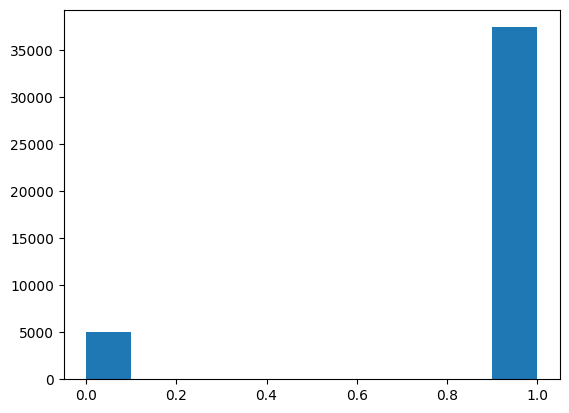

In [131]:
plt.hist(df['target_predicho'])

In [132]:
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho
24203,24204,33,admin.,soltero,universitarios,no,1,si,no,movil,56,8-may-2021,1,-1,0,Sin Información,no,1.0
6608,6609,60,retired,divorciado,primaria,no,1582,no,si,Sin Información,159,18-jun-2021,1,-1,0,Sin Información,no,1.0
43164,43165,32,management,casado,universitarios,si,2,no,no,movil,82,8-jul-2021,1,-1,0,Sin Información,no,1.0


In [133]:
# Suponiendo que 'df' es tu DataFrame original con las columnas 'target' y 'predicciones'

# Contar los valores en la columna 'target'
conteo_target = df['target'].value_counts()

# Contar los valores en la columna 'predicciones'
conteo_predicciones = df['target_predicho'].value_counts()

# Imprimir los conteos
print("Conteo de valores en la columna 'target':")
print(conteo_target)
print("\nConteo de valores en la columna 'predicciones':")
print(conteo_predicciones)


Conteo de valores en la columna 'target':
target
no    37505
si     4941
Name: count, dtype: int64

Conteo de valores en la columna 'predicciones':
target_predicho
1.0    37458
0.0     4988
Name: count, dtype: int64


# Vamos a clasificar todas aquellas personas que tienen "si" en nuestra columna 'target' asi conoceremos mejor nuestros potenciales cliente

In [134]:
# Buscaremos usar un metodo jerarquico para poder agrupar las personas que tengan "si" en nuestra columna 'target'

df_cluster = df.drop(columns=['ID', 'tipo_contacto', 'duracion', 'fecha_contacto', 'campaign', 'tiempo_transcurrido', 'contactos_anteriores', 'resultado_campanas_anteriores'], inplace=False)

df_cluster.sample(3)


,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,target,target_predicho
28340,32,services,casado,secundaria/superiores,no,264,si,si,si,0.0
29283,30,services,casado,secundaria/superiores,no,2,no,si,no,1.0
6145,57,blue-collar,divorciado,primaria,no,3111,no,no,no,1.0


In [135]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_cluster[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']])
a=onehot.transform(df_cluster[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_cluster.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_cluster_train=pd.concat([df_cluster,encoded_df],axis=1)

# Elimino la columna original antigua, la categórica
df_cluster_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_cluster_train.shape)
df_cluster_train.sample(5)

(42446, 30)


,edad,saldo,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,trabajo_management,trabajo_retired,trabajo_self-employed,trabajo_services,...,deuda_no,deuda_si,vivienda_no,vivienda_si,prestamo_no,prestamo_si,target_no,target_si,target_predicho_0.0,target_predicho_1.0
23549,57,75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
35928,32,530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
14535,35,63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7738,58,1299,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1842,37,565,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [136]:
# Guardaremos nuestro modelo para poder aplicarlo en otra base de datos llamada Data_test


# # Entrena tu modelo con los datos de entrenamiento
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

# # Guarda el modelo entrenado en un archivo
# joblib.dump(model, 'modelo_entrenado.pkl')

# Luego, en otro script o en otro momento cuando necesites usar el modelo entrenado:

# Carga el modelo entrenado desde el archivo
# model_cargado = joblib.load('modelo_entrenado.pkl')

# Ahora puedes usar el modelo cargado para hacer predicciones en tus nuevas bases de datos
# y_pred_base1 = model_cargado.predict(X_base1)
# y_pred_base2 = model_cargado.predict(X_base2)

Curva de aprendizaje

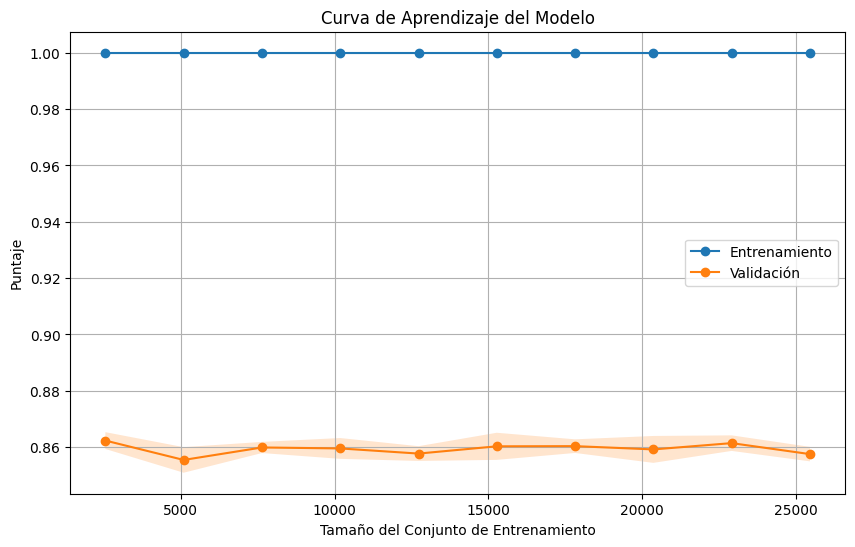

In [141]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    # Calcular la curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    # Calcular los puntajes medios y las desviaciones estándar
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Graficar la curva de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    plt.plot(train_sizes, test_scores_mean, label='Validación', marker='o')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)

    # Configurar el gráfico
    plt.title('Curva de Aprendizaje del Modelo')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('Puntaje')
    plt.legend()
    plt.grid(True)
    plt.show()

# Utilizando la función para graficar la curva de aprendizaje
plot_learning_curve(model_std, X_train_std, y_train, cv=5)